In [1]:
import sys
sys.path.append("..")

import os
os.chdir("..")

from configs.templates import *
from configs.templates_latent import *
from encode import *
import matplotlib.pyplot as plt

In [2]:
conf = tcga_crc_autoenc_latent()
conf.T_eval = 100
conf.latent_T_eval = 100

encoder = ImageEncoder(autoenc_config=conf, autoenc_path=f'checkpoints/tcga_crc_224x224/{conf.name}/last.ckpt')

Seed set to 0


Model params: 205.27 M
loading pretrain ... TCGA-CRC-224
step: 450637
loading latent stats ...


In [3]:
torch.manual_seed(10)
imgs = encoder.sample_unconditional(8)

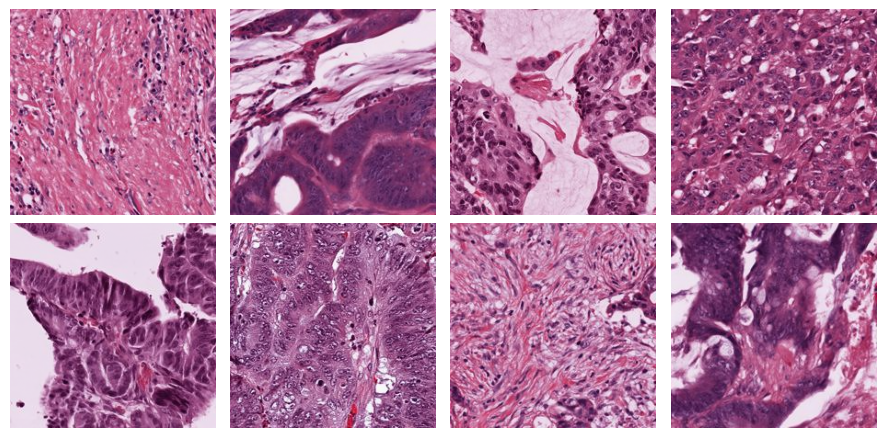

In [6]:
num_rows=2
num_cols=4

img_height, img_width = (224, 224)
dpi = 96 # Display resolution (dots per inch)
fig_width = (img_width * num_cols) / dpi
fig_height = (img_height * num_rows) / dpi

fig, ax = plt.subplots(num_rows, num_cols, figsize=(fig_width, fig_height), dpi=dpi)

for i in range(len(imgs)):
    row = i // num_cols
    col = i % num_cols
    ax[row, col].imshow(imgs[i].cpu().permute([1, 2, 0]))
    ax[row, col].axis('off')
    
plt.tight_layout()
plt.savefig(os.path.join('images', 'unconditionally_sampled_tcga_crc' + '.png'))